In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how='outer', on='city')

# Display the data table for preview
combined_df['type'].value_counts()

combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
urban_df = combined_df.loc[combined_df.type == "Urban"]
suburban_df = combined_df.loc[combined_df.type == "Suburban"]
rural_df = combined_df.loc[combined_df.type == "Rural"]

urban_cities = urban_df.groupby('city').mean()
suburban_cities = suburban_df.groupby('city').mean()
rural_cities = rural_df.groupby('city').mean()


urban_fare = urban_df.groupby('city')['fare'].mean()
suburban_fare = suburban_df.groupby('city')['fare'].mean()
rural_fare = rural_df.groupby('city')['fare'].mean()

urban_count = urban_df.groupby('city')['fare'].count()
suburban_count = suburban_df.groupby('city')['fare'].count()
rural_count = rural_df.groupby('city')['fare'].count()

urban_size = urban_df.groupby('city')['driver_count'].mean().tolist()
suburban_size = suburban_df.groupby('city')['driver_count'].mean().tolist()
rural_size = rural_df.groupby('city')['driver_count'].mean().tolist()

In [4]:
x_urban = urban_count.tolist()
y_urban = urban_fare.tolist()

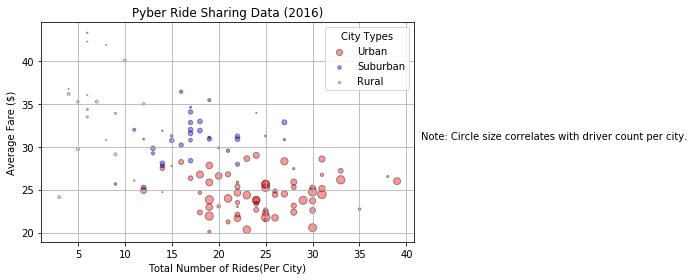

In [28]:
# Obtain the x and y coordinates for each of the three city types. x = # of rides. y = fare
x_urban = urban_count.tolist()
y_urban = urban_fare.tolist()

x_suburban = suburban_count.tolist()
y_suburban = suburban_fare.tolist()

x_rural = rural_count.tolist()
y_rural = rural_fare.tolist()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, s = urban_size, facecolors="red", edgecolors="black", alpha = 0.4)
plt.scatter(x_suburban, y_suburban, s = suburban_size, facecolors="blue", edgecolors="black", alpha = 0.4)
plt.scatter(x_rural, y_rural, s = rural_size, facecolors="yellow", edgecolors="black", alpha = 0.4)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
plt.legend(labels = ["Urban","Suburban","Rural"],title = "City Types")

# Incorporate a text label regarding circle size
plt.figtext(1.6, 0.5, 'Note: Circle size correlates with driver count per city.', horizontalalignment='right')

plt.tight_layout()

# Save Figure
plt.savefig("bubble_chart.png",bbox_inches="tight")

plt.show()

In [ ]:
#3 observable trends
#1. Urban cities on average have the most driver count
#2. Rural cities on average have the least driver count
#3. The average fare for rural cities tend to be the highest and the average fare of urban cities tend to be the
#    highest. This is likely due to the proximity of destinations. 

## Total Fares by City Type

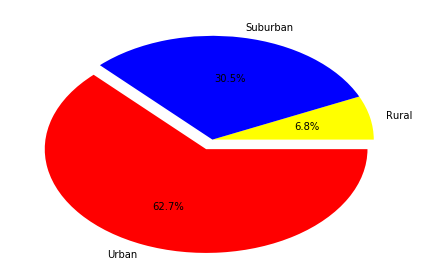

In [48]:
# Calculate Type Percents
combined_df.head()
city_type_df = combined_df.groupby('type')
city_type_df = city_type_df['fare'].sum()

# Build Pie Chart
plt.pie(city_type_df, explode = (0.0,0,0.1), labels = ["Rural","Suburban","Urban"], colors=["yellow","blue","red"], autopct='%1.1f%%')

# Save Figure
plt.tight_layout()
plt.savefig("pie_chart1.png",bbox_inches="tight")
plt.show()

## Total Rides by City Type

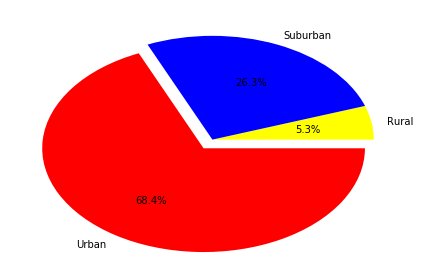

In [51]:
# Calculate Ride Percents
total_rides_df = combined_df.groupby('type')
total_rides_df = total_rides_df['date'].count()

# Build Pie Chart
plt.pie(total_rides_df, explode = (0.0,0,0.1), labels = ["Rural","Suburban","Urban"], colors=["yellow","blue","red"], autopct='%1.1f%%')

# Save Figure
plt.tight_layout()
plt.savefig("pie_chart2.png",bbox_inches="tight")
plt.show()

## Total Drivers by City Type

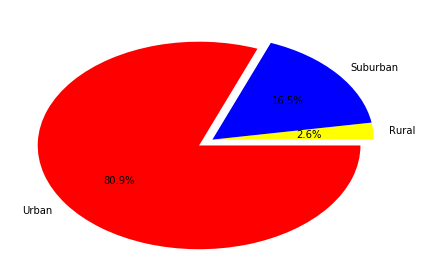

In [61]:
# Calculate Driver Percents
unique_cities_df = combined_df.drop_duplicates(subset = ["city"], keep = "first")
total_drivers_df = unique_cities_df.groupby('type')
total_drivers_df = total_drivers_df['driver_count'].sum()

# Build Pie Charts
plt.pie(total_drivers_df, explode = (0.0,0,0.1), labels = ["Rural","Suburban","Urban"], colors=["yellow","blue","red"], autopct='%1.1f%%')

# Save Figure
plt.tight_layout()
plt.savefig("pie_chart3.png",bbox_inches="tight")
plt.show()